# Project 4: Hydrophone Project

In [1]:
!pip install --upgrade seaborn==0.9.0
!pip install obspy
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime
%matplotlib inline
from scipy.fftpack import fft

Requirement already up-to-date: seaborn==0.9.0 in c:\users\rmr11\anaconda3\lib\site-packages (0.9.0)


# Oregon Shelf

## No wind and no rain - March 13 2019

Calling to the link for the raw data

In [2]:
data_url_1 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/03/13/OO-HYEA2--YDH-2019-03-13T02:16:12.227250.mseed'

Reading the data and obtaining sampling rate

In [3]:
st = read(data_url_1)
print(st[0].stats)
fs = st[0].stats.sampling_rate

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2019-03-13T02:16:12.227250Z
         endtime: 2019-03-13T02:20:00.002547Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 14577620
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 7219, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 29569024})


Plotting Samples

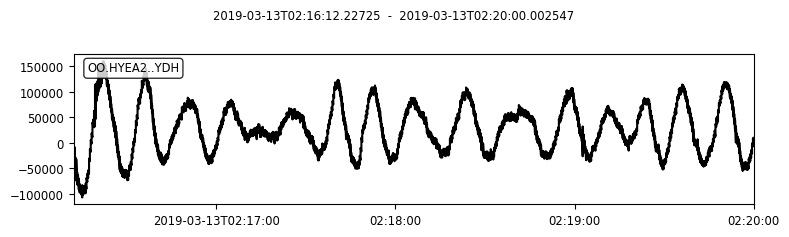

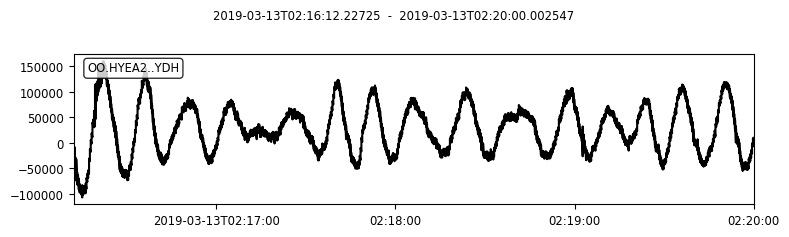

In [4]:
st[0].plot()

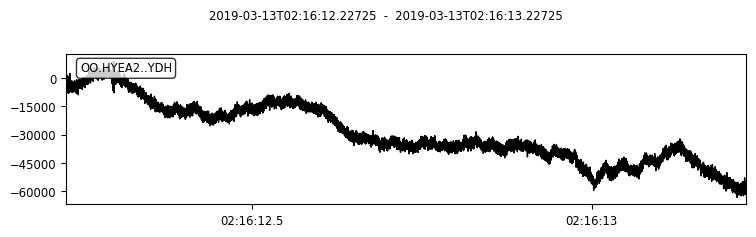

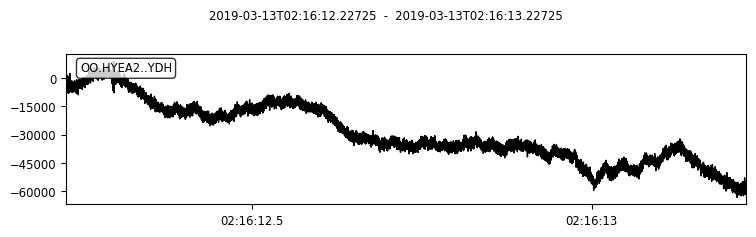

In [5]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

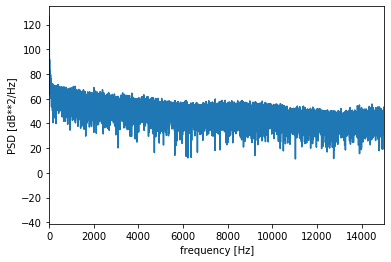

In [6]:
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0, 5000)

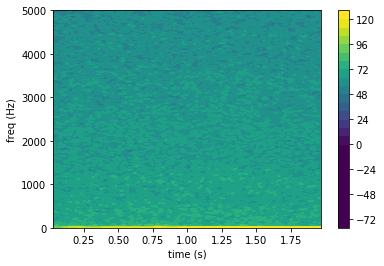

In [7]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

## Wind and No Rain - January 20 2019

In [8]:
data_url_2 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/20/OO-HYEA2--YDH-2019-01-20T00:00:00.000015.mseed'
st = read(data_url_2)

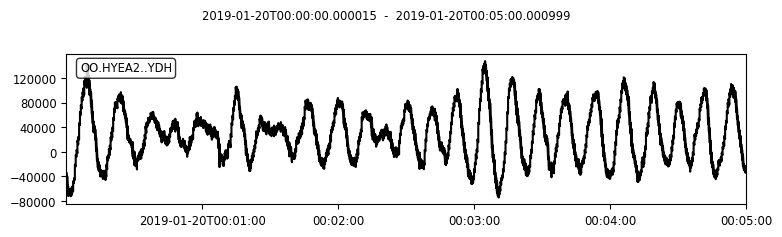

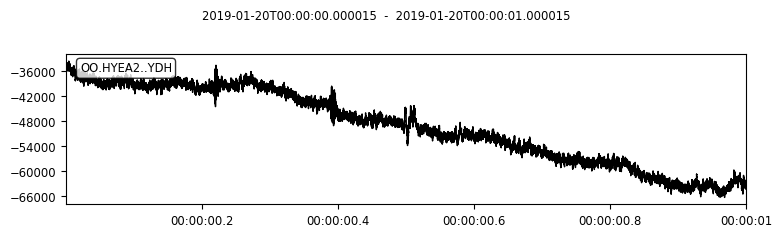

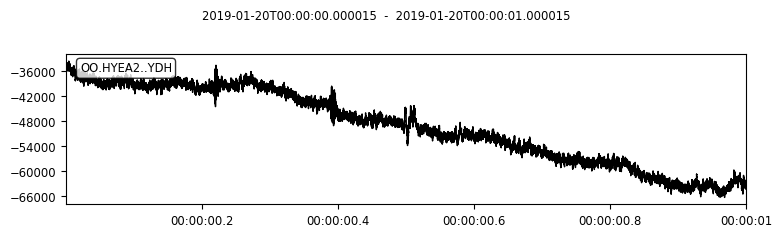

In [9]:
fs = st[0].stats.sampling_rate
st[0].plot()
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

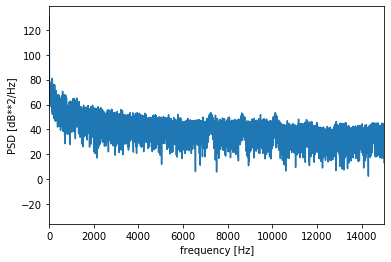

In [10]:
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0, 5000)

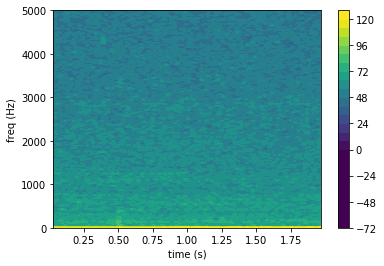

In [11]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

## Rain and No Wind - January 7 2019

In [12]:
data_url_3 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/07/OO-HYEA2--YDH-2019-01-07T00:00:00.000015.mseed'
st = read(data_url_3)

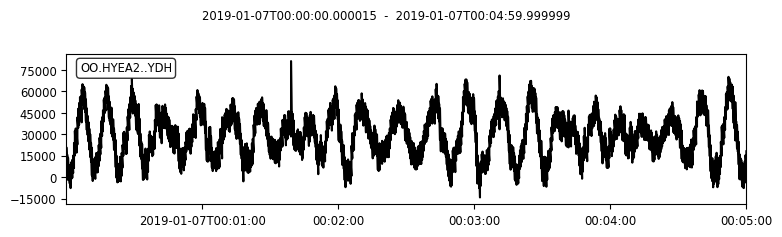

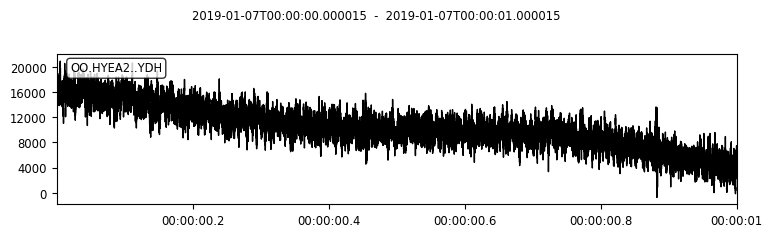

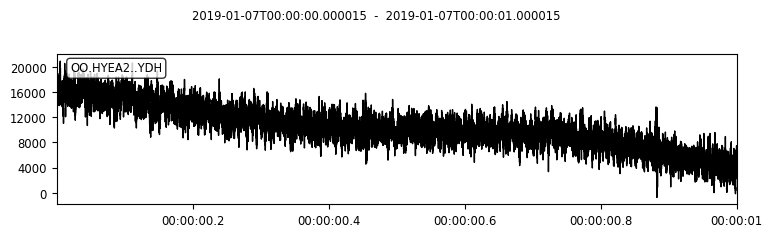

In [13]:
fs = st[0].stats.sampling_rate
st[0].plot()
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

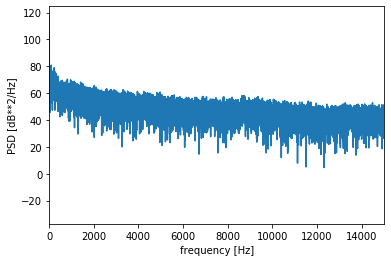

In [14]:
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0, 5000)

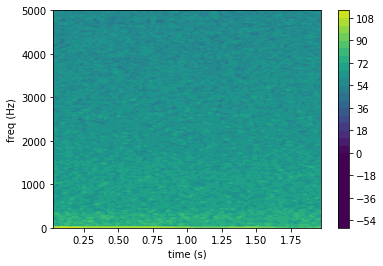

In [15]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

## Wind and Rain - January 1 2019

In [16]:
data_url_4 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/01/OO-HYEA2--YDH-2019-01-01T02:15:24.847250.mseed'
st = read(data_url_4)

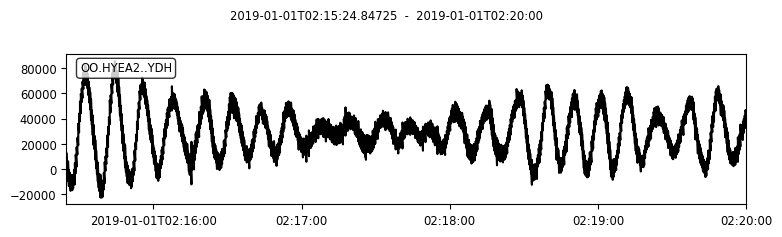

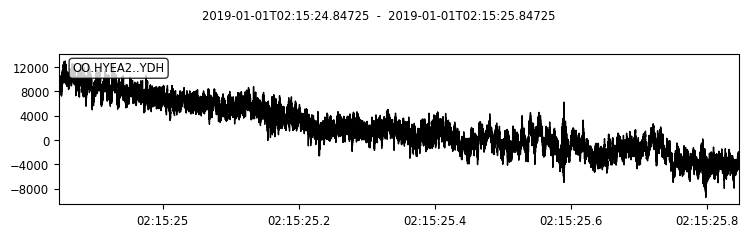

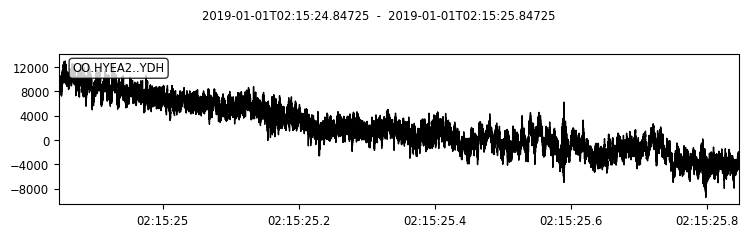

In [17]:
fs = st[0].stats.sampling_rate
st[0].plot()
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

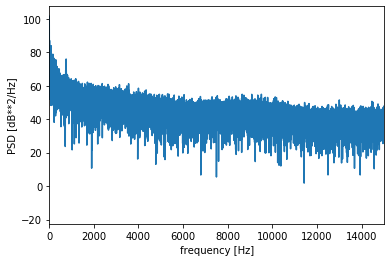

In [18]:
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0, 5000)

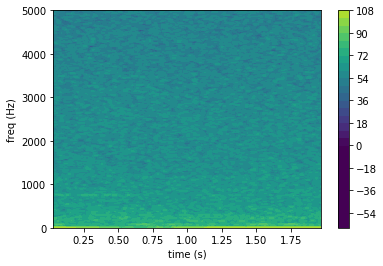

In [19]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

# Oregon Offshore

## No wind and no rain - January 13 2019

In [20]:
data_url_5 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/13/OO-HYEA1--YDH-2019-01-13T00:00:00.000015.mseed'
st = read(data_url_5)

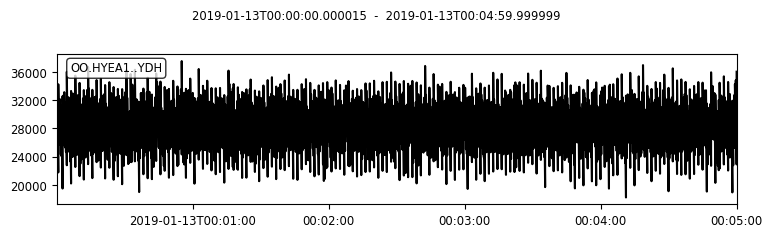

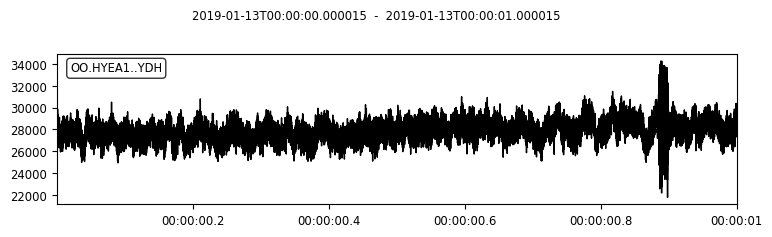

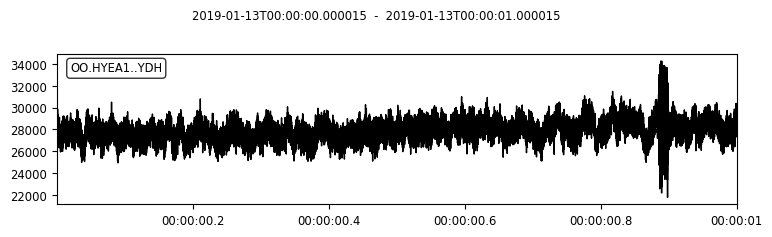

In [21]:
fs = st[0].stats.sampling_rate
st[0].plot()
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

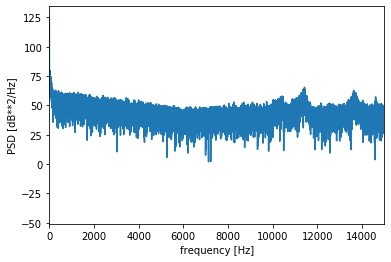

In [22]:
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0, 5000)

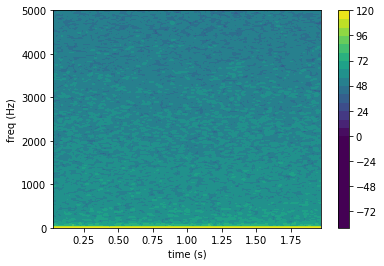

In [23]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

## Wind and No Rain - January 6 2019

In [24]:
data_url_6 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/06/OO-HYEA1--YDH-2019-01-06T00:10:00.000015.mseed'
st = read(data_url_6)

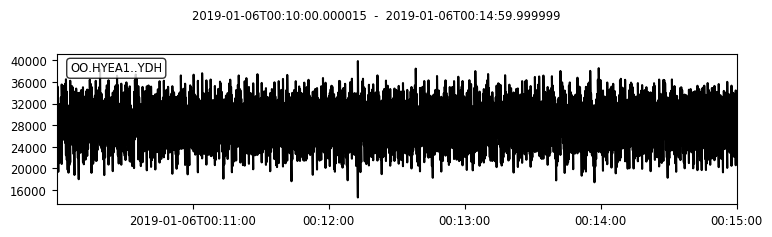

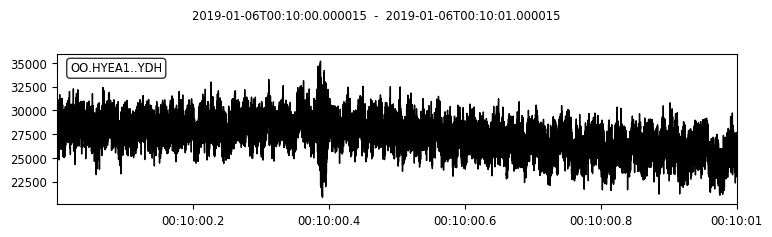

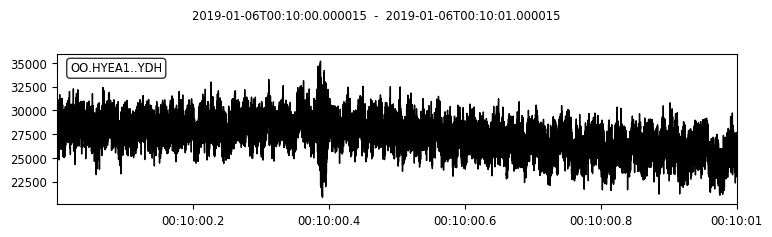

In [25]:
fs = st[0].stats.sampling_rate
st[0].plot()
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

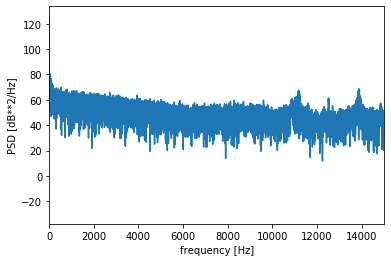

In [26]:
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0, 5000)

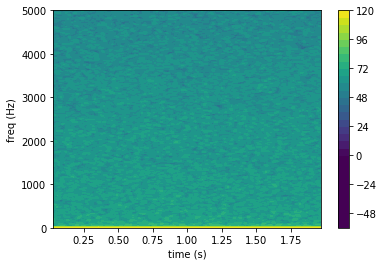

In [27]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

## Rain and No Wind - January 19 2019

In [28]:
data_url_7 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/19/OO-HYEA1--YDH-2019-01-19T00:00:00.000015.mseed'
st = read(data_url_7)

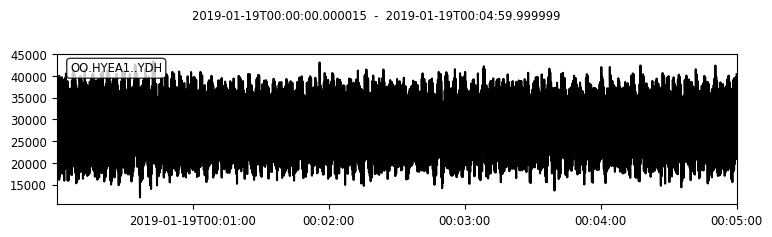

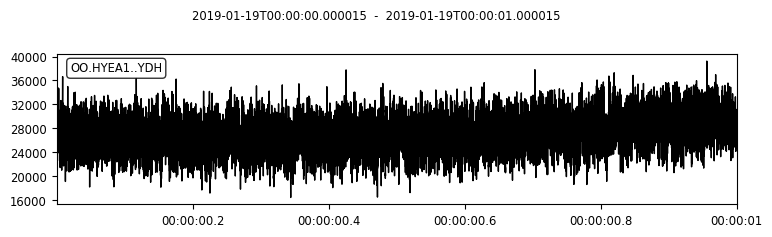

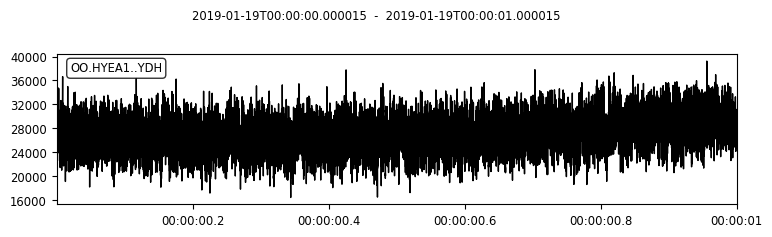

In [29]:
fs = st[0].stats.sampling_rate
st[0].plot()
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

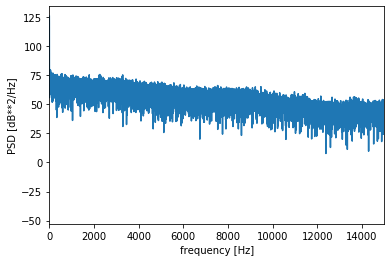

In [30]:
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0, 5000)

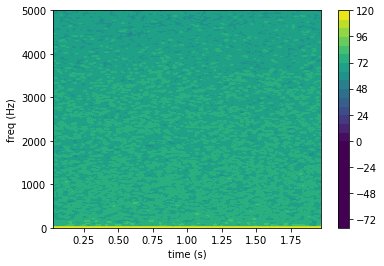

In [31]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

## Wind and Rain - January 1 2019

In [32]:
data_url_8 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/01/OO-HYEA1--YDH-2019-01-01T02:15:23.582250.mseed'
st = read(data_url_8)

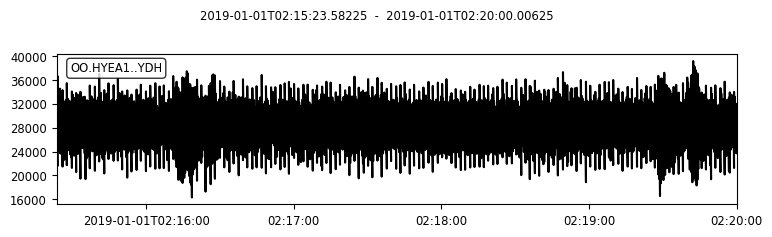

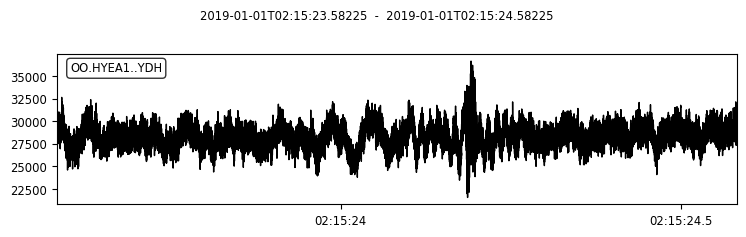

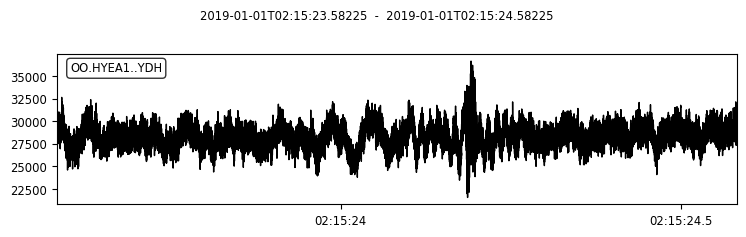

In [33]:
fs = st[0].stats.sampling_rate
st[0].plot()
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

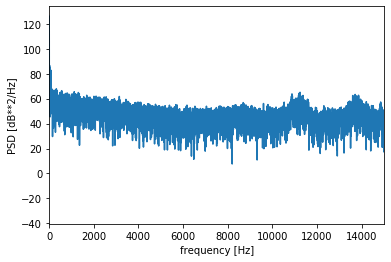

In [34]:
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0, 5000)

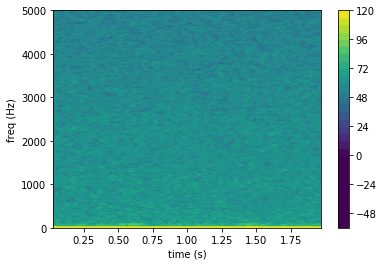

In [35]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

In [36]:
#Reference Links
#shelf
#1 no w no r 3/13
#https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/03/13/OO-HYEA2--YDH-2019-03-13T02:16:12.227250.mseed
#2 w no r 1/20
#https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/20/OO-HYEA2--YDH-2019-01-20T00:00:00.000015.mseed
#3 no w r 1/7
#https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/07/OO-HYEA2--YDH-2019-01-07T00:00:00.000015.mseed
#4 w r 1/1
#https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/01/OO-HYEA2--YDH-2019-01-01T02:15:24.847250.mseed

#offshore
#1  1/13
#https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/13/OO-HYEA1--YDH-2019-01-13T00:00:00.000015.mseed
#2 1/6
#https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/06/OO-HYEA1--YDH-2019-01-06T00:10:00.000015.mseed
#3 1/19
#https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/19/OO-HYEA1--YDH-2019-01-19T00:00:00.000015.mseed
#4 1/1
#https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/01/OO-HYEA1--YDH-2019-01-01T02:15:23.582250.mseed

## Part 2

### Marine Mammal

In [37]:
data_url_9 = 'https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:05:00.000000.mseed'
st = read(data_url_9)

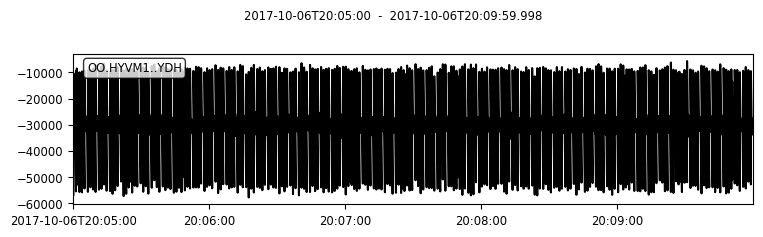

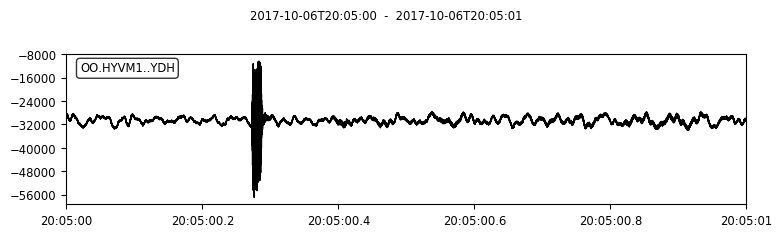

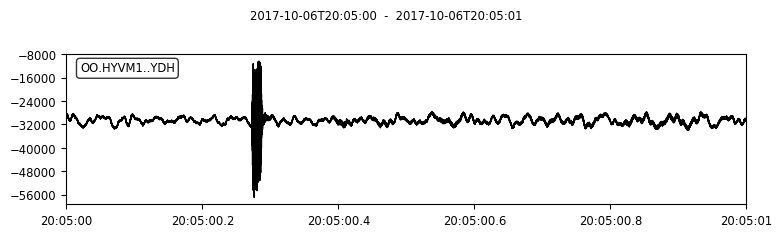

In [38]:
fs = st[0].stats.sampling_rate
st[0].plot()
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

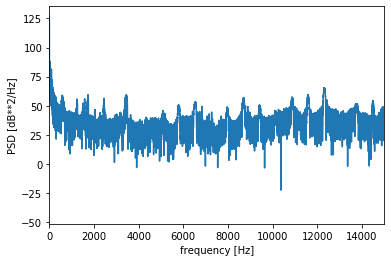

In [39]:
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0, 1200)

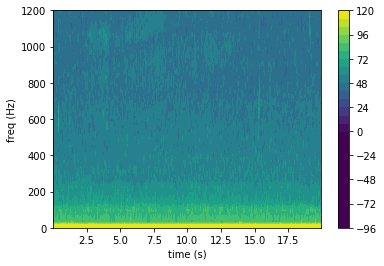

In [40]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 20
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,1200)

### Airgun Noise

In [41]:
data_url_10 = 'https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T00:00:00.000015.mseed'
st = read(data_url_10)

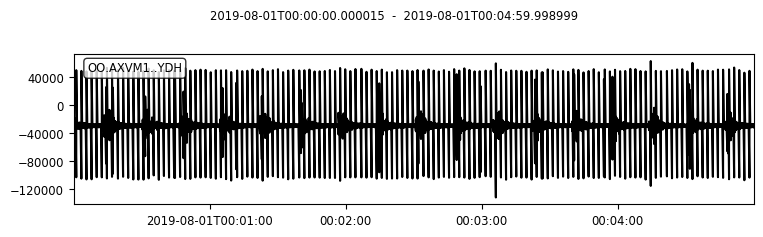

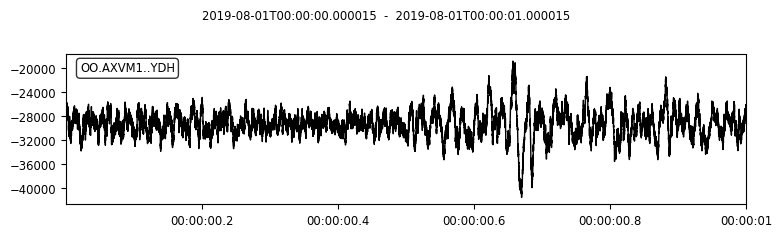

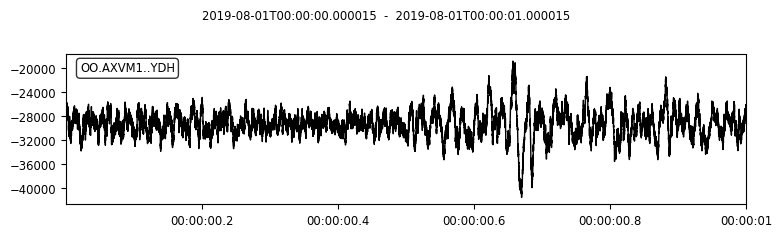

In [42]:
fs = st[0].stats.sampling_rate
st[0].plot()
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

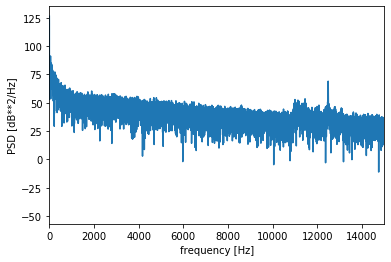

In [43]:
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0, 5000)

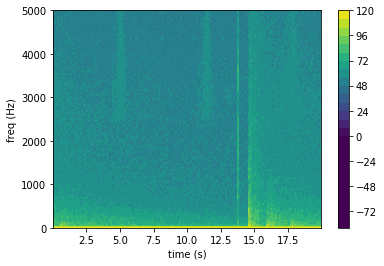

In [44]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 20
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

### Earthquake of Volcano Eruption

In [45]:
data_url_11 = 'https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/16/OO-AXVM1--YDH-2019-08-16T15:25:00.000015.mseed'
st = read(data_url_11)

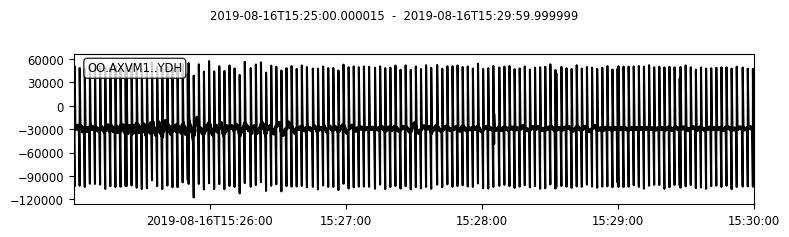

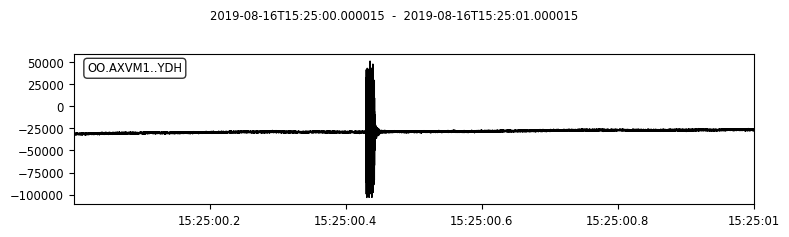

In [46]:
fs = st[0].stats.sampling_rate
st[0].plot()
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)
sliced.plot()
x = (sliced[0].data)*np.hanning(len(sliced[0].data))

(0, 15000)

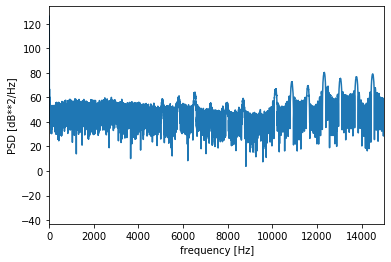

In [47]:
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

In [48]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 30
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

4000


(0, 150)

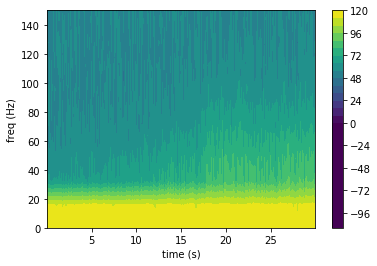

In [49]:
specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,150)